# Regresiòn lineal en Python

## El Paquete scikit-learn para regresiòn lineal y la selecciòn de rasgos 

In [1]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("C://Users/Jo_Revenge/Documents/GitHub/python-ml-course/datasets/ads/Advertising.csv")

In [3]:
feature_cols = ["TV", "Radio", "Newspaper"]

In [4]:
x = data[feature_cols]
y = data["Sales"]

In [5]:
estimator = SVR(kernel="linear") #Decimos que queremos estimar un modelo lineal
selector = RFE(estimator, 2, step=1) #2 es el numero de variables que queremos tener en el modelo, igual a dos
selector =selector.fit(x,y)

In [6]:
selector.support_ # nos dice cuales se han quedado, True, y las que se han borrado, False

array([ True,  True, False])

In [7]:
selector.ranking_ # nos dice que las seleccionadas son las primeras, con rango 1; las con rango mayor no son seleccionadas, pero da la importancia de lkas variables con respecto a lo demas
# A partir de aqui sabemos ya que variables tener. Pero tambien hay un modelo de regression

array([1, 1, 2])

In [8]:
from sklearn.linear_model import LinearRegression as LR 

In [9]:
x_pred = x[["TV", "Radio"]]

In [10]:
lm = LR()
lm.fit(x_pred, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lm.intercept_

2.9210999124051362

In [12]:
lm.coef_

array([0.04575482, 0.18799423])

In [13]:
lm.score(x_pred, y)

0.8971942610828956

# Ejemplos de Regresion lineal, segunda clase SKLearn 

# Variables categoricas 

Como nos comportamos? 
* Dar valores numericos a las categorias (variables dummies);
* las dummies solo puden tener valores de 0 o 1 => voy a poner n-1 dummies donde n es el numero de valores que la categoria assume 

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR

In [15]:
df = pd.read_csv("C://Users/Jo_Revenge/Documents/GitHub/python-ml-course/datasets/ecom-expense/Ecom Expense.csv")

In [16]:
df.head() #Gender y City Tier son categoricas

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [17]:
dummy_gender =pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city =pd.get_dummies(df["City Tier"], prefix="City")

In [18]:
dummy_city.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [19]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [20]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [21]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [22]:
df_new = df_new[column_names].join(dummy_city)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [23]:
feature_cols = ["Monthly Income", "Transaction Time",
                "Gender_Female", "Gender_Male",
                "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [24]:
x = df_new[feature_cols]
y = df_new["Total Spend"]

In [25]:
lm = LR()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [27]:
list(zip(feature_cols, lm.coef_)) # los dummies se complementan entre ellos

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [28]:
lm.score(x,y) #Esto es el R2

0.9179923586131016

In [29]:
TotSp_pred = lm.predict(pd.DataFrame(df_new[feature_cols]))
TotSp_pred
SSD = np.sum((TotSp_pred - df_new["Total Spend"])**2)
print("The SSD is " + str(SSD))
# df_new["prediction"] = Scrivo tutta la formula, e poi sommo le differenze al quadrato tra pred e val attuale, ottenendo l'SSD
# Dopo questo faccio RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1)) #nos dice que tenemos una desviacion de 800€ arriba, 800 abajo en media
print("The RSE is " + str(RSE))
TotSp_m = np.mean(df_new["Total Spend"])
error = RSE/TotSp_m
print("The overall error is " + str(100*error) + "%")
if error>1:
    print("Error is pretty hight")
else:
    print("which is low enough")

The SSD is 1517733985.3408163
The RSE is 803.1318809818165
The overall error is 13.031135680294161%
which is low enough


# Lesson 90 - Eliminar variables dummies redundantes

* Dummies: come se necesitan solo N-1 variables, normalmente se quita una de las categorias para cada dummy. 
* La categoria cancelada se convierte en el caso base, y se refleja en el factor alfa del termino independiente. 
* Eso ayuda a semplificar los modelos. 
=> es lo que vamos a hacer: eliminar variables dummies redundantes

In [30]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:] #iloc nos deja eso
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [31]:
dummy_city = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:] #iloc nos deja eso
dummy_city.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [32]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city)
df_new.head() #ahora tenemos menos variables que antes, que hacemos desaparecer variables con el metodo iloc

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [33]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 3", "City_Tier 2", "Record"]
x = df_new[feature_cols]
y = df_new["Total Spend"]
lm = LR()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lm.intercept_

-133.6778175464251

In [35]:
list(zip(feature_cols, lm.coef_)) # cambian los coeficientes, pero este cambio es balanceado por el cambio de la intercept

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589976),
 ('Gender_Male', 262.05002651109606),
 ('City_Tier 3', -208.6676263302233),
 ('City_Tier 2', -21.625351701262726),
 ('Record', 772.2334457445639)]

In [36]:
lm.score(x,y) # de hecho el modelo es el mismo de antes

0.9179923586131016

Diferencias de los coeficientes:

* ('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589976),
* ('Gender_Male', 262.05002651109606),
* ('City_Tier 3', -208.6676263302233),
* ('City_Tier 2', -21.625351701262726),
* ('Record', 772.2334457445639)
 
Con el modelo completo (redundante):

* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589634),
* ('Gender_Female', -131.02501325554624),
* ('Gender_Male', 131.02501325554607),
* ('City_Tier 1', 76.76432601049513),
* ('City_Tier 2', 55.1389743092325),
* ('City_Tier 3', -131.9033003197277),
* ('Record', 772.2334457445645)
 
Los cambios se reflejan en: 
* gender_male ->
        * 133, despues -> 262 = (131,025 - (-131, 025))
* gender_female -> 0
* los Tiers

los del gender_male es igual a lo del male original menos lo de la mujer 


# Transformacion de Variables para conseguir una relacion no lineal 

Identificar si la relacion es lineal o  no: 
    * hacer un scatterplot de cada variable con la variable que queremos explicar 
    * Si vemos que no es lineal, tendremo que transformar la informacion 

In [37]:
import pandas as pd

In [38]:
data = pd.read_csv("C://Users/Jo_Revenge/Documents/GitHub/python-ml-course/datasets/auto/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [39]:
data.shape

(406, 9)

In [40]:
import matplotlib.pyplot as plt

Text(0.5,1,'HP vs MPG')

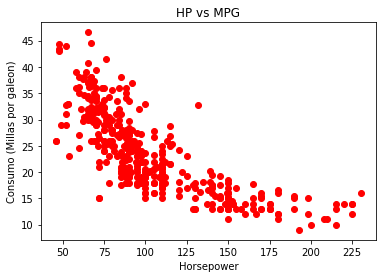

In [41]:
%matplotlib inline
data["mpg"] = data["mpg"].dropna()
data["horsepower"] = data["horsepower"].dropna()
plt.plot(data["horsepower"], data["mpg"], "ro")
plt.xlabel("Horsepower")
plt.ylabel("Consumo (Millas por galeon)")
plt.title("HP vs MPG")

* optamos antes por modelo de regression lineal 


mpg = a +b*horsepower

In [42]:
x = data["horsepower"].fillna(data["horsepower"].mean())
y= data["mpg"].fillna(data["mpg"].mean())
x_data = x[:, np.newaxis]
lm = LR()
lm.fit(x_data, y) #el dato no puede ser array, porque LR trabaja con DataFrames. Lo que hago es transformarlo en array n dimensional

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

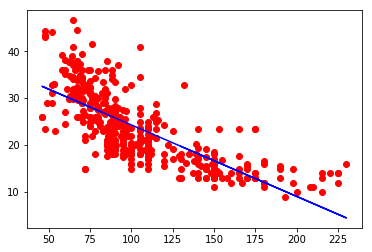

In [43]:
%matplotlib inline 
plt.plot(x,y, "ro")
y_pred = lm.predict(x_data)
plt.plot(x ,y_pred, color = "blue")

In [44]:
lm.score(x_data,y)

0.574653340645025

In [45]:
SSD = np.sum((y-y_pred)**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
print(error, y_mean, SSD,RSE)

0.21462773361633458 23.51457286432162 10315.75196006092 5.046879480825511


* Optamos por un modelo de regression quadratico 

mpg = a + b* horsepower^2

In [46]:
x = data["horsepower"].fillna(data["horsepower"].mean())
y= data["mpg"].fillna(data["mpg"].mean())
x_data = x[:, np.newaxis]**2 # el cambio esta en usar aqui x^2
lm = LR()
lm.fit(x_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
lm.score(x_data, y) #vemos que ha bajado un poco, 

0.4849887034823205

In [48]:
y_pred = lm.predict(x_data)
SSD = np.sum((y-y_pred)**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
print(error, y_mean, SSD,RSE) # ha aumentado el error, osea que no

0.236168898529981 23.51457286432162 12490.350340501926 5.553410772769817


* Combinacion de lineal y cuadratico 

mpg = a + b*horsepower + c*horsepower^2

In [49]:
from sklearn.preprocessing import PolynomialFeatures as PlF
from sklearn import linear_model as lnm

In [50]:
poly = PlF(degree=2) #necesita generar una potencia con un grado maximo dado 

In [51]:
x_data = poly.fit_transform(x[:,np.newaxis])

In [52]:
lm = lnm.LinearRegression() #cambiamos en este caso el metodo que utilizamos
lm.fit(x_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
lm.score(x_data,y) #vemos que con el modelo polinomial aumenta el factor del r2

0.6439066584257469

In [54]:
lm.intercept_

55.02619244708036

In [55]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026  -0.43404318*hp + 0.00112615*hp^2

In [56]:
def regression_validation(x_data, y, y_pred):
    y_pred = lm.predict(x_data)
    SSD = np.sum((y-y_pred)**2)
    RSE = np.sqrt(SSD/(len(x_data)-1))
    y_mean = np.mean(y)
    error = RSE/y_mean
    print("error: ", str(error*100), "% Y_mean: ", str(y_mean), "SSD: ", str(SSD), "RSE: ", str(RSE))

In [57]:
for d in range(2,6):
    poly = PlF(degree=d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm = lnm.LinearRegression()
    lm.fit(x_data,y)
    print("The polynom with degree", str(d) , "has R^2 ", lm.score(x_data,y))
    print("and coefficients and intercept", lm.coef_, lm.intercept_)
    regression_validation(x_data, y, lm.predict(x_data)) #el polinomio de grado dos parece ser lo que mejor predice el consumo, es lo con que me quedaria

The polynom with degree 2 has R^2  0.6439066584257469
and coefficients and intercept [ 0.         -0.43404318  0.00112615] 55.02619244708036
error:  19.63795466190689 % Y_mean:  23.51457286432162 SSD:  8636.180643524502 RSE:  4.61778115803654
The polynom with degree 3 has R^2  0.6444678885560744
and coefficients and intercept [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06] 58.44877411191831
error:  19.622473106036676 % Y_mean:  23.51457286432162 SSD:  8622.56936742855 RSE:  4.614140736300908
The polynom with degree 4 has R^2  0.6467674189704502
and coefficients and intercept [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08] 40.09664385351243
error:  19.55891250126878 % Y_mean:  23.51457286432162 SSD:  8566.799832491353 RSE:  4.5991947315797574
The polynom with degree 5 has R^2  0.6547512491514693
and coefficients and intercept [ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621368e-04
 -2.36220932e-06  3.41983017e-09] -40.6938465

In [58]:
def regression_validation(x_data, y, y_pred):
    y_pred = lm.predict(x_data)
    SSD = np.sum((y-y_pred)**2)
    RSE = np.sqrt(SSD/(len(x_data)-1))
    y_mean = np.mean(y)
    error = RSE/y_mean
    print("error: ", str(error*100), "% Y_mean: ", str(y_mean), "SSD: ", str(SSD), "RSE: ", str(RSE))

# El problema de los outliers

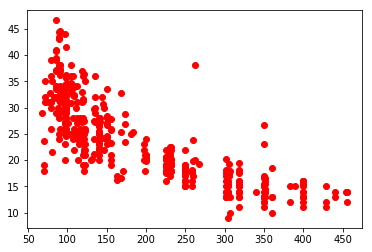

In [63]:
# Se hace siempre antes con outliers, luego quitandolos y si compara el modelo
plt.plot(data["displacement"], data["mpg"], "ro")

In [71]:
x = data["displacement"].fillna(data["displacement"].mean())
x = x[:,np.newaxis]
y= data["mpg"].fillna(data["mpg"].mean())
lm = LR()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
lm.score(x,y)

0.6261049762826918

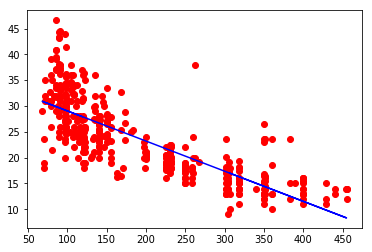

In [79]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color = "blue")

In [84]:
data[(data["displacement"]>300) &(data["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [86]:
data_clean = data.drop([258,305,372,395])

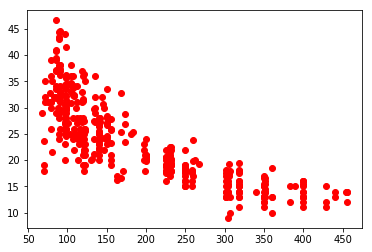

In [88]:
plt.plot(data_clean["displacement"], data_clean["mpg"], "ro")

In [99]:
x = data_clean["displacement"].fillna(data_clean["displacement"].mean())
x = x[:,np.newaxis]
y= data_clean["mpg"].fillna(data_clean["mpg"].mean())
lm = LR()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
lm.score(x,y)

0.6466514317531822

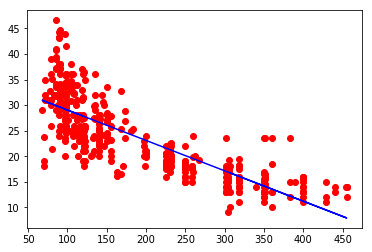

In [102]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color = "blue")